# **Importation des packages et Data Set**



*' INTRODUCTION

Objectif de l'Analyse
L'objectif principal de cette analyse est de déterminer les facteurs de risque associés à l'obésité en utilisant l'algorithme K-Means pour identifier les différents profils de risque au sein de la population étudiée. Ensuite, nous développerons un modèle de prédiction précis basé sur les clusters obtenus par K-Means pour identifier les individus à risque.'. 

In [163]:
# importer les packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from collections import Counter
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_score, recall_score
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, chi2
import pickle

In [164]:
# importer la base de données
df = pd.read_csv(r'C:/Users/21698\/Desktop/archive/ObesityDataSet_raw_and_data_sinthetic.csv', sep=',', encoding='utf-8') 

In [165]:
# afficher la base de données
df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000000,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,21.000000,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,27.000000,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22.000000,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [166]:
#affficher nom des colonnes
df.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP',
       'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE',
       'CAEC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

# **Data Exploration**

Gender: Feature, Categorical, "Gender"
Age : Feature, Continuous, "Age"
Height: Feature, Continuous
Weight: Feature Continuous
family_history_with_overweight: Feature, Binary, " Has a family member suffered or suffers from overweigh? "

FAVC : Feature, Binary, " Do you eat high caloric food frequently? "
FCVC : Feature, Integer, " Do you usually eat vegetables in your meals? "
NCP : Feature, Continuous, " How many main meals do you have daily? "
CAEC : Feature, Categorical, " Do you eat any food between meals? "
SMOKE : Feature, Binary, " Do you smoke? "
CH2O: Feature, Continuous, " How much water do you drink daily? "
SCC: Feature, Binary, " Do you monitor the calories you eat daily? "
FAF: Feature, Continuous, " How often do you have physical activity? "
TUE : Feature, Integer, " How much time do you use technological devices such as cell phone, videogames, television, computerand others? "

CALC : Feature, Categorical, " How often do you drink alcohol? "
MTRANS : Feature, Categorical, " Which transportation do you usually use? "
NObeyesdad : Target, Categorical, "Obesity level"

In [167]:
# modifier les noms des colonnes
noms_nouveaux = {
    'Age': 'age',
    'Gender': 'gender',
    'Height': 'height',
    'Weight': 'weight',
    'family_history_with_overweight': 'family',
    'FAVC': 'freq_high_calor',
    'FCVC': 'freq_vegetab',
    'NCP': 'main_meals',
    'CAEC': 'snacks_between',
    'SMOKE': 'smoke',
    'CH2O': 'water',
    'SCC' : 'Kcal_control',
    'FAF': 'sport',
    'TUE': 'tech_device',
    'CALC': 'alcohol',
    'MTRANS': 'transport',
    'NObeyesdad': 'obesity_level'
}

# Renommer 
df = df.rename(columns=noms_nouveaux)

In [168]:
# afficher la taille de la base de données
df.shape

(2111, 17)

*` Dans la base de données il y a  2111 lignes 17 colonnes.`*

In [169]:
# vérifier s'il existe des données dupliqué
df.duplicated().sum()

24

*` Nous obtenons comme resultat 24 ligne dupliquer.`*

In [170]:
# Supprimer les lignes dupliquées
df = df.drop_duplicates()

# Vérifier à nouveau lignes dupliquées
nb_duplications_restantes = df.duplicated().sum()
print("Nombre de lignes dupliquées restantes :", nb_duplications_restantes)

Nombre de lignes dupliquées restantes : 0


In [171]:
# voir les informations de chaque colonne
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              2087 non-null   float64
 1   gender           2087 non-null   object 
 2   height           2087 non-null   float64
 3   weight           2087 non-null   float64
 4   alcohol          2087 non-null   object 
 5   freq_high_calor  2087 non-null   object 
 6   freq_vegetab     2087 non-null   float64
 7   main_meals       2087 non-null   float64
 8   Kcal_control     2087 non-null   object 
 9   smoke            2087 non-null   object 
 10  water            2087 non-null   float64
 11  family           2087 non-null   object 
 12  sport            2087 non-null   float64
 13  tech_device      2087 non-null   float64
 14  snacks_between   2087 non-null   object 
 15  transport        2087 non-null   object 
 16  obesity_level    2087 non-null   object 
dtypes: float64(8), obje

*`=> Il y a 0 valeurs manquantes et 0 null. Mais il y a des erreurs. age doit être entier .`*

In [172]:
# afficher les statistiques descriptives pour les données numériques 
df.describe()

,age,height,weight,freq_vegetab,main_meals,water,sport,tech_device
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,24.353090,1.702674,86.858730,2.421466,2.701179,2.004749,1.012812,0.663035
std,6.368801,0.093186,26.190847,0.534737,0.764614,0.608284,0.853475,0.608153
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.915937,1.630178,66.000000,2.000000,2.697467,1.590922,0.124505,0.000000
50%,22.847618,1.701584,83.101100,2.396265,3.000000,2.000000,1.000000,0.630866
75%,26.000000,1.769491,108.015907,3.000000,3.000000,2.466193,1.678102,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


age :

Count : Il y a 2087 entrées pour l'âge.
Moyenne : L'âge moyen est d'environ,35 ans.
Écart type : L'écart type est d'environ 6,37 nne.
Min : L'âge minimum est de 14 ans.
25% : Le premier quartile est à environ 19,92 ans.
50% : La martile) est à environ 22,85 ans.
75% : Le troisième quartile est à environ 26 ans.
Max : L'âge maximum est de Pour la colonne weight :

Count : Il y a également 2087 entrées pour le poids.
Moyenne : Le poids moyen est d'environ 86,86 kilogrammes.
Écart type : L'écart type est d'environ 26,19 kilogranne.
Min : Le poids minimum est de 39 kilogrammes.
25% : Le premier quartile est à environ 66 kilogrammes.
50% : La médiane (deuxième quartile) est à environ 83,10 kilogrammes.
75% : Le troisième quartile est à environ 108,02 kilogrammes.
Max : Le poids maximum est de 173 kil

 etc ...ogrammes.variable.

In [173]:
# afficher les statistiques descriptives pour données catégorielles avant d'effectuer les changements
df.describe(include=['object'])

,gender,alcohol,freq_high_calor,Kcal_control,smoke,family,snacks_between,transport,obesity_level
count,2087,2087,2087,2087,2087,2087,2087,2087,2087
unique,2,4,2,2,2,2,4,5,7
top,Male,Sometimes,yes,no,no,yes,Sometimes,Public_Transportation,Obesity_Type_I
freq,1052,1380,1844,1991,2043,1722,1761,1558,351


gender :

Count : Il y a 2087 entrées pour le genre.
Unique : Il y a 2 catégories uniques, probablement 'Male" et "Female".
Top : La catégorie la plus fréquente est "Male".
Freq : Il y a 1052 occurrences de "Male".
    
alcohol :

Count : Il y a également 2087 entrées pour la consommation d'alcool.
Unique : Il y a 4 catégories uniques pour la fréquence de consommation d'alcool.
Top : La catégorie la plus fréquente est "Sometimes".
Freq : Il y a 1380 occurrences de "Sometimes".

    etc..

In [174]:
# Afficher les valeurs uniques pour les variables catégorielles et le nombre de valeurs uniques pour les variables non catégorielles
for col in df.columns:
    if df[col].dtype == 'object':
        print(col, '- unique values:', df[col].unique())
print("\n")
for col in df.columns:    
    if df[col].dtype != 'object':  
        print(col, '- number of unique values:', df[col].nunique())



gender - unique values: ['Female' 'Male']
alcohol - unique values: ['no' 'Sometimes' 'Frequently' 'Always']
freq_high_calor - unique values: ['no' 'yes']
Kcal_control - unique values: ['no' 'yes']
smoke - unique values: ['no' 'yes']
family - unique values: ['yes' 'no']
snacks_between - unique values: ['Sometimes' 'Frequently' 'Always' 'no']
transport - unique values: ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
obesity_level - unique values: ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


age - number of unique values: 1402
height - number of unique values: 1574
weight - number of unique values: 1525
freq_vegetab - number of unique values: 810
main_meals - number of unique values: 635
water - number of unique values: 1268
sport - number of unique values: 1190
tech_device - number of unique values: 1129


*`Les variables  qualitatives comprennent : 'gender', 'alcohol', 'freq_high_calor', 'Kcal_control', 'smoke', 'family', 'snacks_between', 'transport' et 'obesity_level'.

Les variables quantitatives comprennent : 'age', 'height', 'weight', 'freq_vegetab', 'main_meals', 'water', 'sport' et 'tech_devic'..`*

In [175]:
# voir les valeurs possibles de chaque colonne catégorielle
for col in df.select_dtypes('object').columns:
   
    print(df[col].value_counts(), '\n')
    print( '\n')

gender
Male      1052
Female    1035
Name: count, dtype: int64 



alcohol
Sometimes     1380
no             636
Frequently      70
Always           1
Name: count, dtype: int64 



freq_high_calor
yes    1844
no      243
Name: count, dtype: int64 



Kcal_control
no     1991
yes      96
Name: count, dtype: int64 



smoke
no     2043
yes      44
Name: count, dtype: int64 



family
yes    1722
no      365
Name: count, dtype: int64 



snacks_between
Sometimes     1761
Frequently     236
Always          53
no              37
Name: count, dtype: int64 



transport
Public_Transportation    1558
Automobile                456
Walking                    55
Motorbike                  11
Bike                        7
Name: count, dtype: int64 



obesity_level
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_II    290
Normal_Weight          282
Overweight_Level_I     276
Insufficient_Weight    267
Name: count, dtype: int64 





*`Dans notre cas, sans effectuer de calcul précis, il semble que les classes ne sont pas parfaitement équilibrées, mais elles ne sont pas non plus très déséquilibrées. `*

In [176]:
from imblearn.over_sampling import RandomOverSampler


# Créer une copie DataFrame 
df_equilibre = df.copy()

# Séparer les variables explicatives (X) de la variable cible (y)
X = df_equilibre.drop(columns=['obesity_level'])
y = df_equilibre['obesity_level']

# Initialiser le sur-échantillonneur
oversampler = RandomOverSampler(random_state=42)

# Sur-échantillonner les données
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Reconstruire le DataFrame équilibré
df_equilibre = pd.DataFrame(X_resampled, columns=X.columns)
df_equilibre['obesity_level'] = y_resampled

# Vérifier la répartition de nouveau
print(df_equilibre['obesity_level'].value_counts())


obesity_level
Normal_Weight          351
Overweight_Level_I     351
Overweight_Level_II    351
Obesity_Type_I         351
Insufficient_Weight    351
Obesity_Type_II        351
Obesity_Type_III       351
Name: count, dtype: int64


*`maintenant notre base de donnée est équilibré `*

In [177]:
df=df_equilibre
# afficher les statistiques descriptives pour les données numériques 
df_equilibre.describe()


,age,height,weight,freq_vegetab,main_meals,water,sport,tech_device
count,2457.000000,2457.000000,2457.000000,2457.000000,2457.000000,2457.000000,2457.000000,2457.000000
mean,24.239704,1.703404,85.385713,2.423219,2.703609,1.997089,1.027056,0.663344
std,6.349400,0.093202,26.240873,0.537252,0.776908,0.607976,0.853206,0.608941
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.758286,1.631662,64.000000,2.000000,2.675411,1.569082,0.155579,0.000000
50%,22.596576,1.703317,82.207978,2.407817,3.000000,2.000000,1.000000,0.635867
75%,26.000000,1.768834,105.479313,3.000000,3.000000,2.444125,1.684582,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


* ` Le nombre de  colonne a augmenté à 2457.` 
* `le weight est trs variés , nous allons etudiée beaucoup de niveau d obésité `

# **Exploratory Data Analysis EDA**

**1.   Variable target**

` commencons parla distribution de la target variable "obesity_level".`

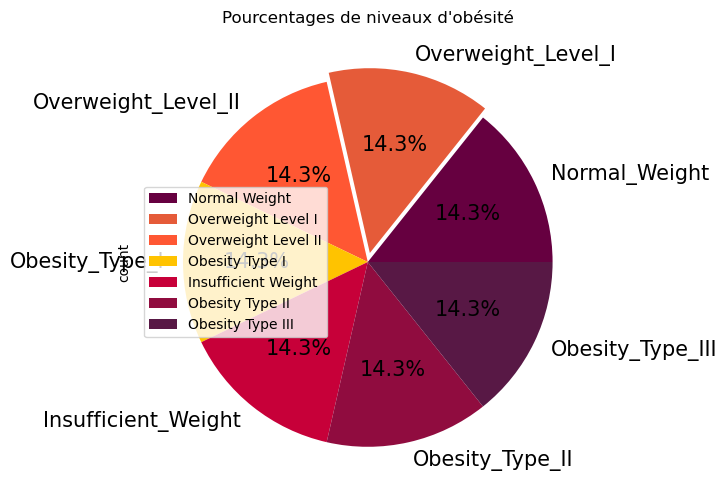

In [178]:
import matplotlib.pyplot as plt

# Créer une figure et définir sa taille
plt.figure(figsize=(10, 6))

# Tracer un diagramme circulaire (pie chart) pour visualiser les pourcentages
df['obesity_level'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#660040', '#E55B39', '#FF5733', '#FFC300', '#C70039', '#900C3F', '#581845']
, explode=[0, 0.05, 0, 0, 0, 0, 0], textprops={"fontsize": 15})

# Titre du graphique
plt.title('Pourcentages de niveaux d\'obésité')

# Légende
plt.legend(labels=['Normal Weight', 'Overweight Level I', 'Overweight Level II', 'Obesity Type I', 'Insufficient Weight', 'Obesity Type II', 'Obesity Type III'])

# Affichage du graphique
plt.show()





*`=> on remarque que notre dataset est  équlibré avec une partition equitable de 14.3%`*

**2. Variables explicatives**

In [179]:
# Afficher les valeurs uniques pour les variables catégorielles et le nombre de valeurs uniques pour les variables non catégorielles
for col in df.columns:
    if df[col].dtype == 'object':
        print(col, df[col].unique())
print("\n")
for col in df.columns:    
    if df[col].dtype != 'object':  
        print(col, '- number of unique values:', df[col].nunique())



gender ['Female' 'Male']
alcohol ['no' 'Sometimes' 'Frequently' 'Always']
freq_high_calor ['no' 'yes']
Kcal_control ['no' 'yes']
smoke ['no' 'yes']
family ['yes' 'no']
snacks_between ['Sometimes' 'Frequently' 'Always' 'no']
transport ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
obesity_level ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


age - number of unique values: 1402
height - number of unique values: 1574
weight - number of unique values: 1525
freq_vegetab - number of unique values: 810
main_meals - number of unique values: 635
water - number of unique values: 1268
sport - number of unique values: 1190
tech_device - number of unique values: 1129


In [180]:
# voir les informations de chaque colonne
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2457 entries, 0 to 2456
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              2457 non-null   float64
 1   gender           2457 non-null   object 
 2   height           2457 non-null   float64
 3   weight           2457 non-null   float64
 4   alcohol          2457 non-null   object 
 5   freq_high_calor  2457 non-null   object 
 6   freq_vegetab     2457 non-null   float64
 7   main_meals       2457 non-null   float64
 8   Kcal_control     2457 non-null   object 
 9   smoke            2457 non-null   object 
 10  water            2457 non-null   float64
 11  family           2457 non-null   object 
 12  sport            2457 non-null   float64
 13  tech_device      2457 non-null   float64
 14  snacks_between   2457 non-null   object 
 15  transport        2457 non-null   object 
 16  obesity_level    2457 non-null   object 
dtypes: float64(8),

> ***age  main_meals   sport (arrondi)***  entier

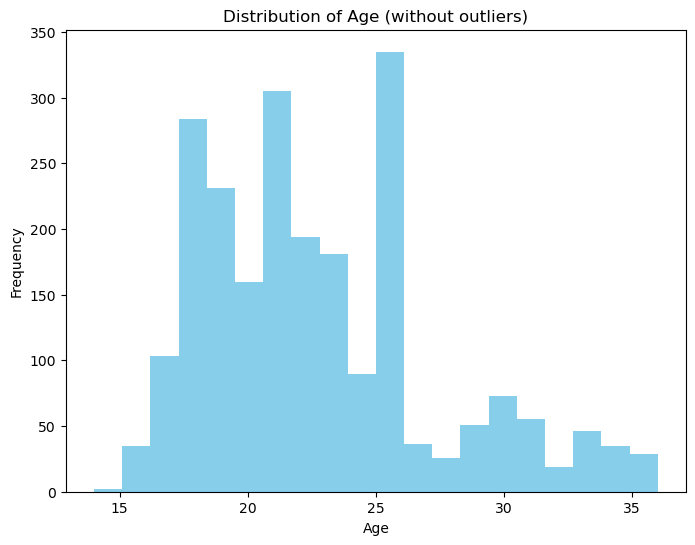

In [181]:
# Conversion de la colonne 'age' en entier
df['age'] = df['age'].astype(int)

# Suppression des valeurs aberrantes (outliers) dans la colonne 'age'
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrage des valeurs en dehors de la plage interquartile
df = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]

# Création du graphique pour la distribution de 'age' après suppression des outliers
plt.figure(figsize=(8, 6))
plt.title('Distribution of Age (without outliers)')
plt.hist(df['age'], bins=20, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

la majorité des gens eudies sont generalement des jeunes  (moins 27 ans) , il y une variance qui n est pas negligable selon les different age

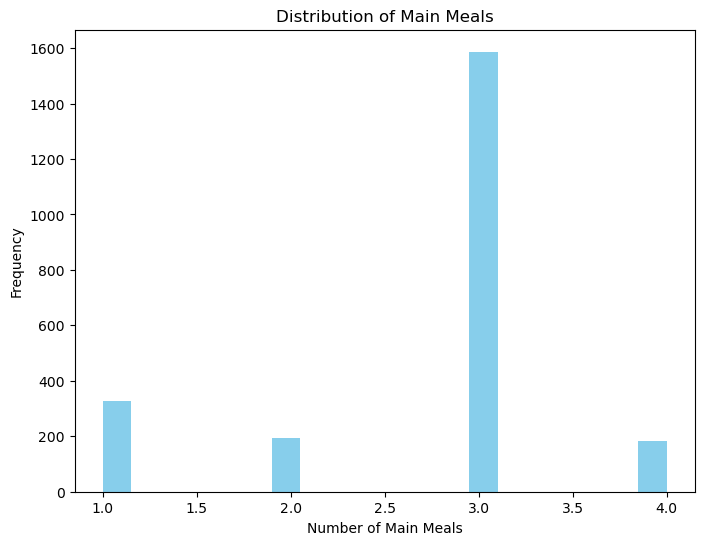

In [182]:
# Conversion de la colonne 'main_meals' en entier arrondi
df.loc[:, 'main_meals'] = df['main_meals'].round().astype(int)

# Création du graphique pour la distribution de 'main_meals'
plt.figure(figsize=(8, 6))
plt.title('Distribution of Main Meals')
plt.hist(df['main_meals'], bins=20, color='skyblue')
plt.xlabel('Number of Main Meals')
plt.ylabel('Frequency')
plt.show()

comme c est prévu , la majorité des gens prennent 3 main meal par jours , mais on peut pas negliger les autre parties

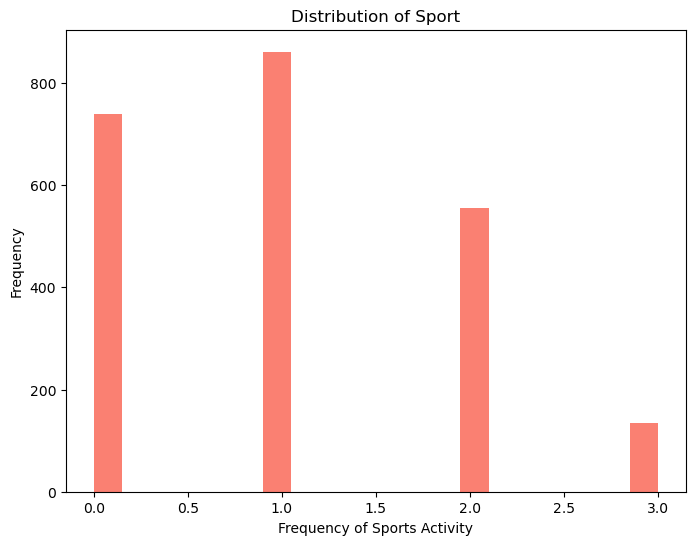

In [183]:
import pandas as pd
import matplotlib.pyplot as plt



# Conversion de la colonne 'sport' en entier arrondi
df.loc[:, 'sport'] = df['sport'].round().astype(int)

# Création du graphique pour la distribution de 'sport'
plt.figure(figsize=(8, 6))
plt.title('Distribution of Sport')
plt.hist(df['sport'], bins=20, color='salmon')
plt.xlabel('Frequency of Sports Activity')
plt.ylabel('Frequency')
plt.show()


on remarque que 1/3 des gens ne sont pas intersse en activite sportif , contre 2/3 avec une frequence 1 vers 2 jour par semaine pour la majorite de ces 2/3

> ***freq_vegetab  tech_device *** no sometimes usually always

In [184]:
#un résumé statistique de 'freq_vegetab'
df['freq_vegetab'].describe()



count    2290.000000
mean        2.428684
std         0.546414
min         1.000000
25%         2.000000
50%         2.450614
75%         3.000000
max         3.000000
Name: freq_vegetab, dtype: float64

In [185]:
import pandas as pd

# Calcule des seuils pour chaque catégorie en fonction de la répartition des valeurs de la colonne 'freq_vegetab'
thresholds = [0, 1, 2, 3, float('inf')]
categories = ['no', 'Sometimes', 'Frequently', 'Always']

# Conversion de la colonne 'freq_vegetab' en catégories basées sur les seuils calculés
df['freq_vegetab'] = pd.cut(df['freq_vegetab'], bins=thresholds, labels=categories, right=False)

# Changement du type de données de la colonne 'freq_vegetab' en 'object'
df['freq_vegetab'] = df['freq_vegetab'].astype('object')

# Affichage des nouvelles catégories de la colonne 'freq_vegetab' avec le compte des valeurs
print(df['freq_vegetab'].value_counts())


freq_vegetab
Frequently    1314
Always         734
Sometimes      242
Name: count, dtype: int64


C:\Users\21698\AppData\Local\Temp\ipykernel_14056\4157296534.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['freq_vegetab'] = pd.cut(df['freq_vegetab'], bins=thresholds, labels=categories, right=False)
C:\Users\21698\AppData\Local\Temp\ipykernel_14056\4157296534.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['freq_vegetab'] = df['freq_vegetab'].astype('object')


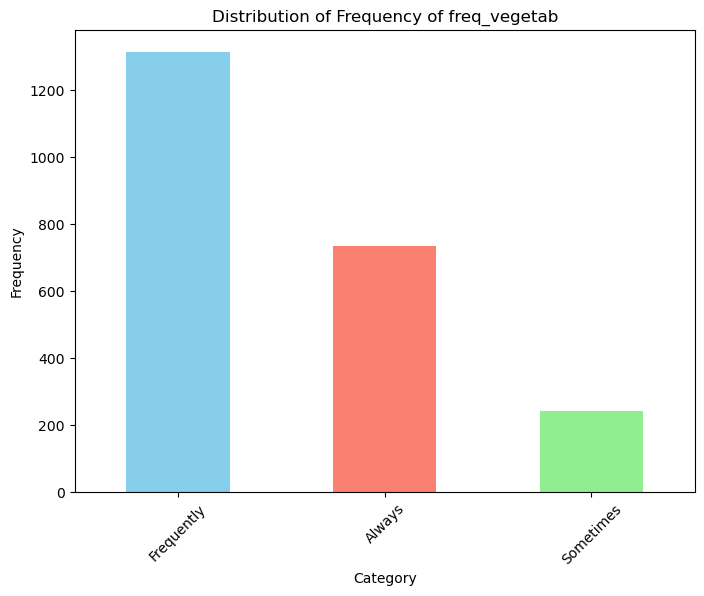

In [186]:
# Création du graphique pour visualiser la répartition des nouvelles catégories de la colonne 'tech_device'
plt.figure(figsize=(8, 6))
plt.title('Distribution of Frequency of freq_vegetab')
df['freq_vegetab'].value_counts().plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen', 'orange'])
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

on remarque la majorité mange frequemment du "vegetable"  et d autre le fait toujours  , ce pendant il y une minorité qui le mange de temps en temps

In [187]:
#un résumé statistique  'tech_device'
df['tech_device'].describe()

count    2290.000000
mean        0.697829
std         0.608475
min         0.000000
25%         0.024088
50%         0.691148
75%         1.000000
max         2.000000
Name: tech_device, dtype: float64

In [188]:
# Calcule des seuils pour chaque catégorie en fonction de la répartition des valeurs de la colonne 'tech_device'
thresholds = [-0.5, 0.5, 1, 1.5, 2.5]
categories = ['no', 'Sometimes', 'Frequently', 'Always']

# Conversion de la colonne 'tech_device' en catégories basées sur les seuils calculés
df['tech_device'] = pd.cut(df['tech_device'], bins=thresholds, labels=categories, right=False)

# Changement du type de données de la colonne 'tech_device' en 'object'
df['tech_device'] = df['tech_device'].astype('object')

# Affichage des nouvelles catégories de la colonne 'tech_device' avec le compte des valeurs
print(df['tech_device'].value_counts())

tech_device
no            962
Frequently    539
Sometimes     508
Always        281
Name: count, dtype: int64


C:\Users\21698\AppData\Local\Temp\ipykernel_14056\33342011.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tech_device'] = pd.cut(df['tech_device'], bins=thresholds, labels=categories, right=False)
C:\Users\21698\AppData\Local\Temp\ipykernel_14056\33342011.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tech_device'] = df['tech_device'].astype('object')


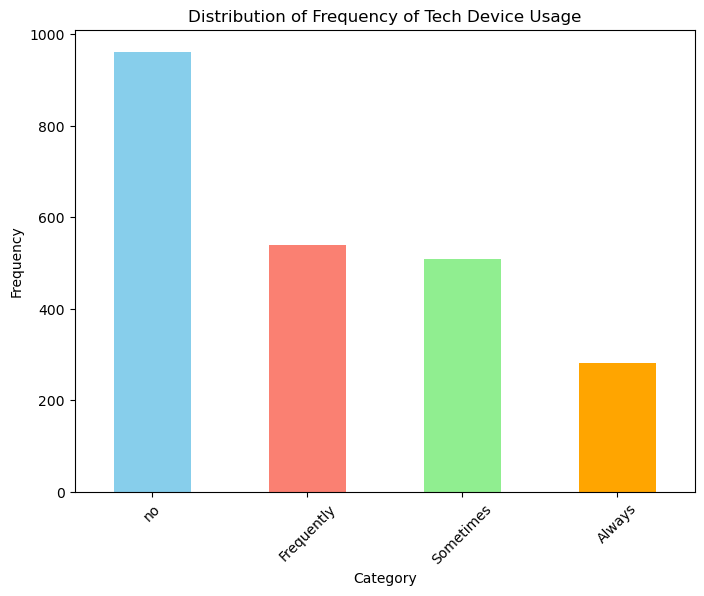

In [189]:
# Création du graphique pour visualiser la répartition de la colonne 'tech_device'
plt.figure(figsize=(8, 6))
plt.title('Distribution of Frequency of Tech Device Usage')
df['tech_device'].value_counts().plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen', 'orange'])
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

premiere cette partition est tres positive , on constate que peu de gens sont addictés en tech device, et que la majorité des gens l utilsent de temps en temps ou moins que ca

> ***freq_high_calor  Kcal_control  smoke  family  *** 0 1

C:\Users\21698\AppData\Local\Temp\ipykernel_14056\1277974051.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['freq_high_calor'] = df['freq_high_calor'].map({'no': 0, 'yes': 1 })


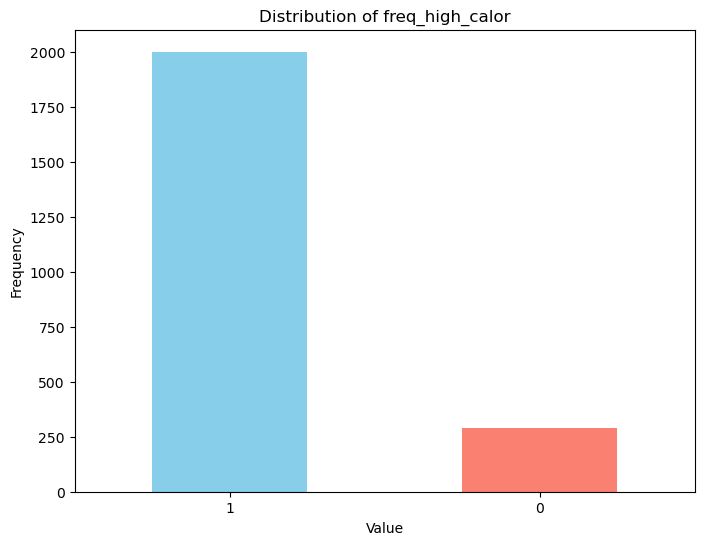

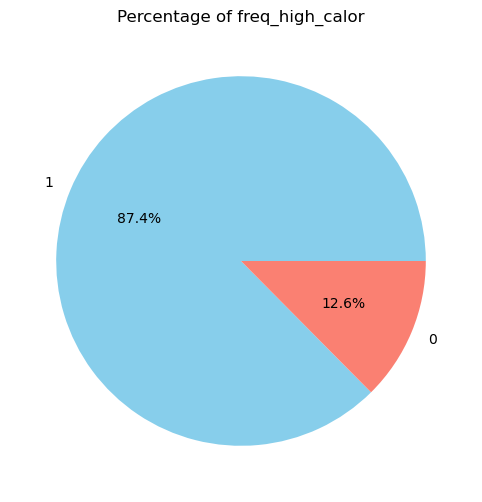

In [190]:


# Nettoyage et conversion des valeurs 'yes' et 'no' en 0 et 1
df['freq_high_calor'] = df['freq_high_calor'].map({'no': 0, 'yes': 1 })

# Création du graphique pour  'freq_high_calor'
plt.figure(figsize=(8, 6))
plt.title('Distribution of freq_high_calor')
df['freq_high_calor'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

# Création du graphique pour le pourcentage de 'freq_high_calor'
plt.figure(figsize=(8, 6))
plt.title('Percentage of freq_high_calor')
df['freq_high_calor'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.ylabel('')
plt.show()


presque 90% mange frequemment 'meals' avec high calories

C:\Users\21698\AppData\Local\Temp\ipykernel_14056\2009249847.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Kcal_control'] = df['Kcal_control'].map({'no': 0, 'yes': 1})


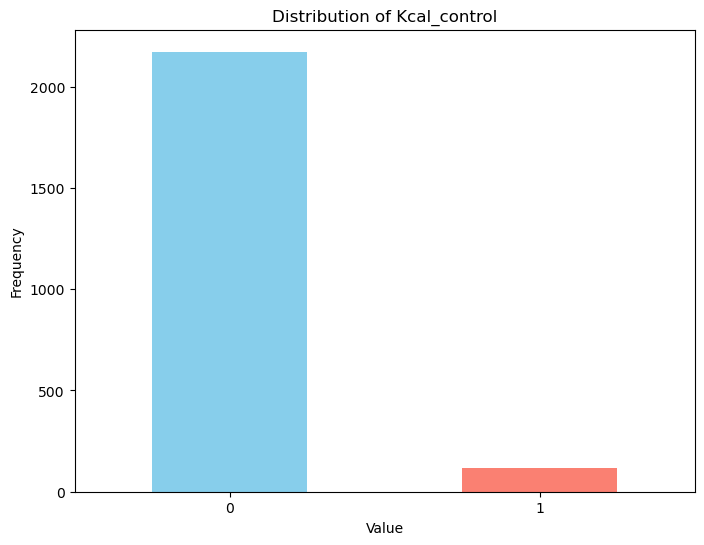

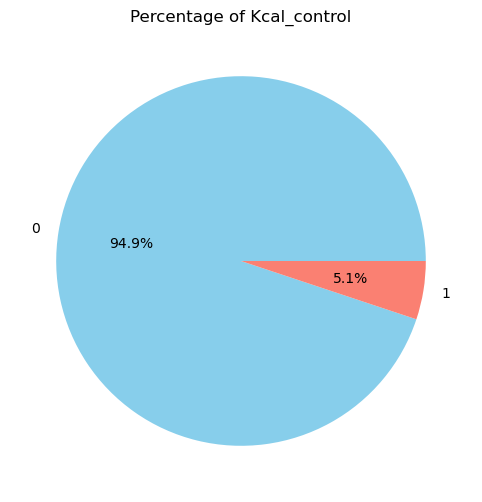

In [191]:

# Nettoyage et conversion des valeurs 'yes' et 'no' en 0 et 1
df['Kcal_control'] = df['Kcal_control'].map({'no': 0, 'yes': 1})

# Création du graphique pour la répartition de 'Kcal_control'
plt.figure(figsize=(8, 6))
plt.title('Distribution of Kcal_control')
df['Kcal_control'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

# Création du graphique pour le pourcentage de 'Kcal_control'
plt.figure(figsize=(8, 6))
plt.title('Percentage of Kcal_control')
df['Kcal_control'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.ylabel('')
plt.show()


 plus  que 95% ne controle pas ce qu ils mange pour les 'meals' high calories

C:\Users\21698\AppData\Local\Temp\ipykernel_14056\557709457.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoke'] = df['smoke'].map({'no': 0, 'yes': 1})


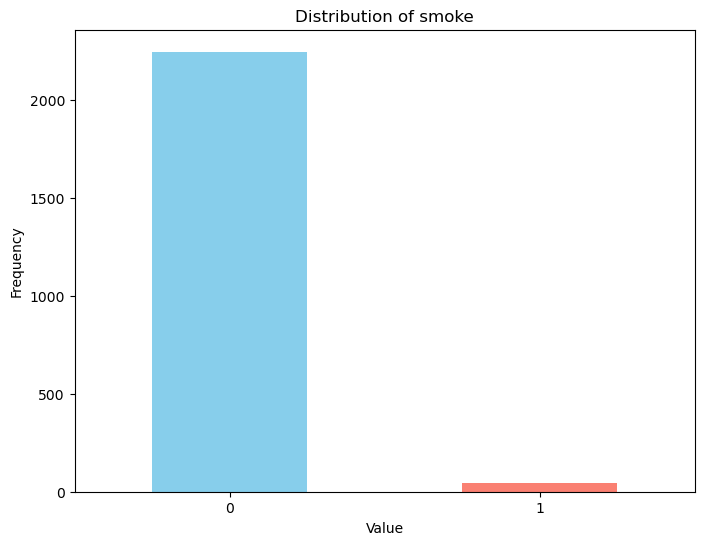

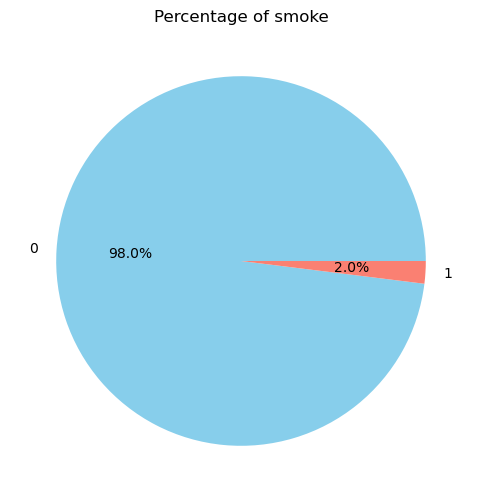

In [192]:


# Nettoyage et conversion des valeurs 'yes' et 'no' en 0 et 1
df['smoke'] = df['smoke'].map({'no': 0, 'yes': 1})

# Création du graphique pour la répartition de 'smoke'
plt.figure(figsize=(8, 6))
plt.title('Distribution of smoke')
df['smoke'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

# Création du graphique pour le pourcentage de 'smoke'
plt.figure(figsize=(8, 6))
plt.title('Percentage of smoke')
df['smoke'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.ylabel('')
plt.show()


une petite monirité 'smoke' (2%)

C:\Users\21698\AppData\Local\Temp\ipykernel_14056\754341459.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['family'] = df['family'].map({'no': 0, 'yes': 1})


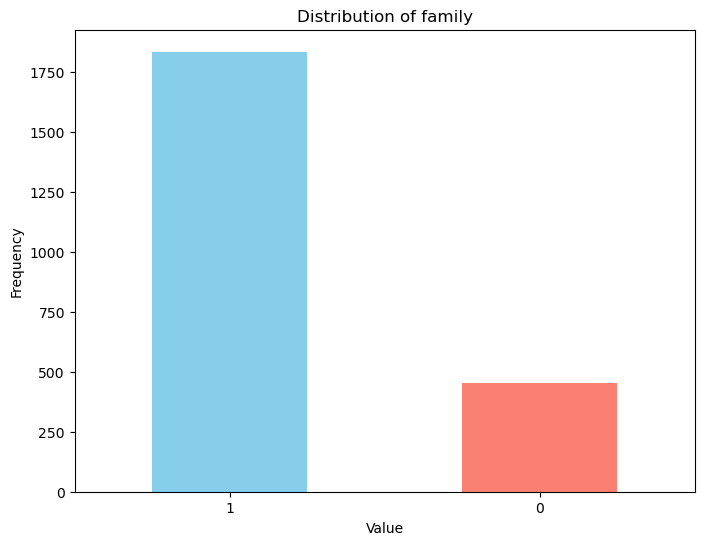

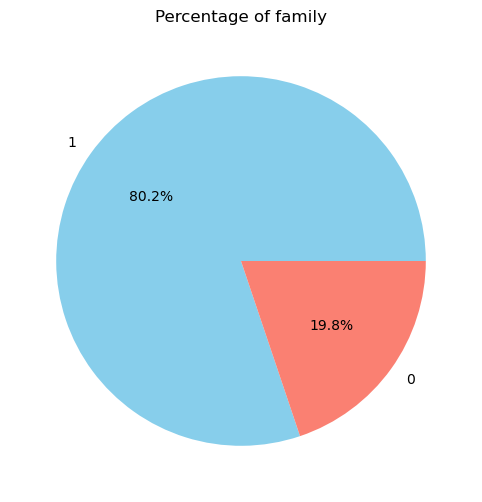

In [193]:

# Nettoyage et conversion des valeurs 'yes' et 'no' en 0 et 1
df['family'] = df['family'].map({'no': 0, 'yes': 1})

# Création du graphique pour la répartition de 'family'
plt.figure(figsize=(8, 6))
plt.title('Distribution of family')
df['family'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

# Création du graphique pour le pourcentage de 'family'
plt.figure(figsize=(8, 6))
plt.title('Percentage of family')
df['family'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.ylabel('')
plt.show()


c est attendu d avoir ce resultat, plus de  80% ont une histoire dans leur famille avec l obesiteé

In [194]:
#afficher resultat de netoyage

df

,age,gender,height,weight,alcohol,freq_high_calor,freq_vegetab,main_meals,Kcal_control,smoke,water,family,sport,tech_device,snacks_between,transport,obesity_level
0,21,Female,1.620000,64.000000,no,0,Frequently,3.0,0,0,2.000000,1,0.0,Frequently,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.520000,56.000000,Sometimes,0,Always,3.0,1,1,3.000000,1,3.0,no,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.800000,77.000000,Frequently,0,Frequently,3.0,0,0,2.000000,1,2.0,Frequently,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.800000,87.000000,Frequently,0,Always,3.0,0,0,2.000000,0,2.0,no,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.780000,89.800000,Sometimes,0,Frequently,1.0,0,0,2.000000,0,0.0,no,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2451,22,Male,1.691303,80.539000,Sometimes,1,Frequently,2.0,0,0,2.000000,1,3.0,Always,Sometimes,Public_Transportation,Overweight_Level_II
2453,34,Female,1.681021,77.392179,no,1,Frequently,2.0,0,0,1.921601,1,1.0,Sometimes,Sometimes,Automobile,Overweight_Level_II
2454,22,Male,1.784555,89.836692,Sometimes,1,Sometimes,2.0,0,0,2.000000,1,0.0,Sometimes,Sometimes,Public_Transportation,Overweight_Level_II
2455,34,Male,1.690000,84.000000,no,0,Frequently,3.0,0,0,3.000000,1,2.0,no,Sometimes,Automobile,Overweight_Level_II


In [195]:
# voir les informations de chaque colonne
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2290 entries, 0 to 2456
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              2290 non-null   int32  
 1   gender           2290 non-null   object 
 2   height           2290 non-null   float64
 3   weight           2290 non-null   float64
 4   alcohol          2290 non-null   object 
 5   freq_high_calor  2290 non-null   int64  
 6   freq_vegetab     2290 non-null   object 
 7   main_meals       2290 non-null   float64
 8   Kcal_control     2290 non-null   int64  
 9   smoke            2290 non-null   int64  
 10  water            2290 non-null   float64
 11  family           2290 non-null   int64  
 12  sport            2290 non-null   float64
 13  tech_device      2290 non-null   object 
 14  snacks_between   2290 non-null   object 
 15  transport        2290 non-null   object 
 16  obesity_level    2290 non-null   object 
dtypes: float64(5), int3

3- variables bivariées

In [196]:
# Afficher les valeurs uniques pour les variables catégorielles
for col in df.columns:
    if df[col].dtype == 'object':
        print(col, df[col].unique())

print("\n")

# Afficher le nombre de valeurs uniques pour les variables non catégorielles
for col in df.columns:    
    if df[col].dtype != 'object': 
        if df[col].nunique() < 5:
            print(col, '- unique values:', df[col].unique())
        else :
            print(col, '- number of unique values:', df[col].nunique())

gender ['Female' 'Male']
alcohol ['no' 'Sometimes' 'Frequently' 'Always']
freq_vegetab ['Frequently' 'Always' 'Sometimes']
tech_device ['Frequently' 'no' 'Always' 'Sometimes']
snacks_between ['Sometimes' 'Frequently' 'Always' 'no']
transport ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
obesity_level ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


age - number of unique values: 23
height - number of unique values: 1464
weight - number of unique values: 1421
freq_high_calor - unique values: [0 1]
main_meals - unique values: [3. 1. 4. 2.]
Kcal_control - unique values: [0 1]
smoke - unique values: [0 1]
water - number of unique values: 1169
family - unique values: [1 0]
sport - unique values: [0. 3. 2. 1.]


 *** Variables numériques  ***

In [197]:
print(df['obesity_level'].value_counts())

obesity_level
Obesity_Type_III       351
Insufficient_Weight    349
Normal_Weight          344
Overweight_Level_I     332
Obesity_Type_II        319
Overweight_Level_II    307
Obesity_Type_I         288
Name: count, dtype: int64


In [198]:
df =df_equilibre

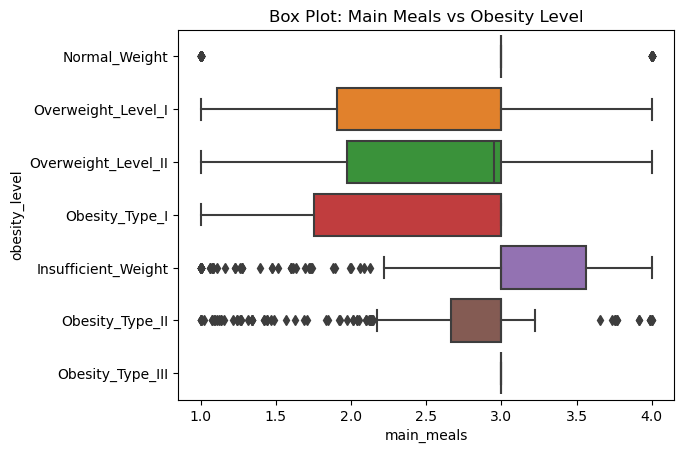

In [199]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for 'main_meals' vs 'obesity_level'
sns.boxplot(data=df, x='main_meals', y='obesity_level')
plt.title('Box Plot: Main Meals vs Obesity Level')
plt.show()


on remarque qu il y de la differencce au niveau de nombre de meals , cependant si on les separe en groupe , plus votre niveau d ov=besite est grave plus vous aurez de meals (on va pas parler de insifficient weight car cela cherche a gagner du poinds donc c est naturel qu il vont manger plus que le normal ) , (de meme pour les normal , ils menent une fecon de vie normal avec 3 meals par jours , pourles overweight ils sont entre 2 et 3 meals avec un min 1 un max 3 , contraitemnt the overiweight plus les niveaux extremes  , prennent presque toujours 3 meals

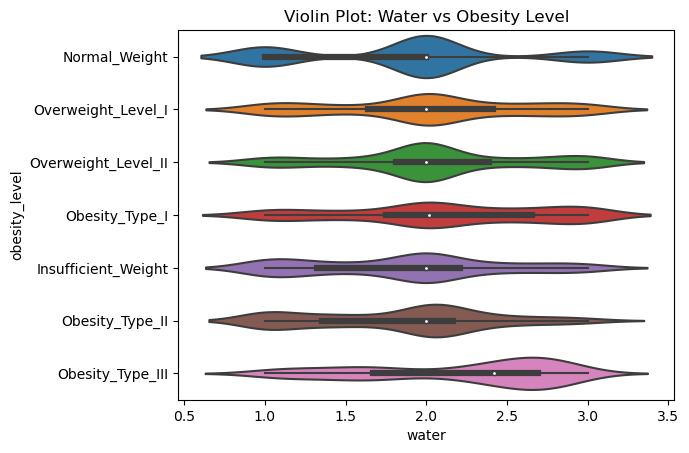

In [200]:
import seaborn as sns
import matplotlib.pyplot as plt

# Violin plot for 'water' vs 'obesity_level'
sns.violinplot(data=df, x='water', y='obesity_level')
plt.title('Violin Plot: Water vs Obesity Level')
plt.show()


la majorité prend 2 littre par jour , et on remarque les obesite 1 ,3 tend vers 3 littre , tant que inssufficient weight a lune portion deau moins que le reste

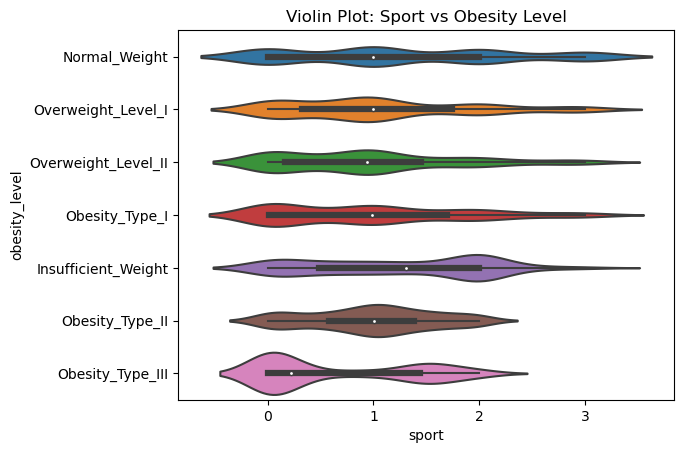

In [201]:
import seaborn as sns
import matplotlib.pyplot as plt

# Violin plot for 'sport' vs 'obesity_level'
sns.violinplot(data=df, x='sport', y='obesity_level')
plt.title('Violin Plot: Sport vs Obesity Level')
plt.show()


de meme , plus votre etat est grave , moins vous practiquez du sport , et on parle ici surtout obesity 2 ,3

 *** Variables catégorielles ***

obesity_level  Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
alcohol                                                             
Always                           0              2               0   
Frequently                       1             21              14   
Sometimes                      205            196             172   
no                             145            132             165   

obesity_level  Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
alcohol                                                                
Always                       0                 0                   0   
Frequently                   3                 0                  21   
Sometimes                  255               350                 264   
no                          93                 1                  66   

obesity_level  Overweight_Level_II  
alcohol                             
Always                           0  
Frequently                      22  
Some

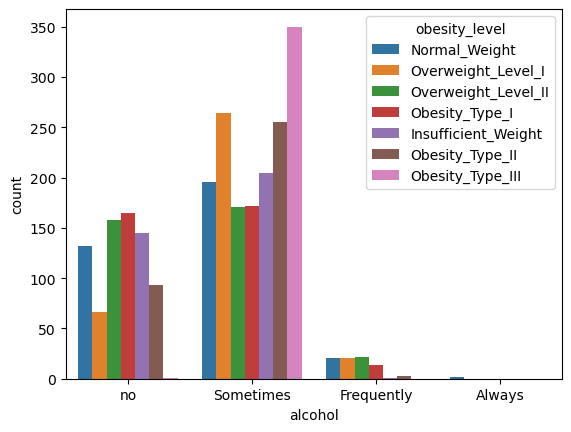

In [202]:
import seaborn as sns

# Tableau de contingence
contingency_table = pd.crosstab(df['alcohol'], df['obesity_level'])

# Afficher le tableau de contingence
print(contingency_table)

# Visualisation avec un graphique en barres empilées
sns.countplot(data=df, x='alcohol', hue='obesity_level')
plt.show()

on remarqu la majprité prent de l alcool sometimes (surtout l obesite 3 ) 
et que le reste ne prend pas ( on neglig la minorité resttant)

obesity_level   Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
snacks_between                                                       
Always                            2             41               6   
Frequently                      160            102               6   
Sometimes                       185            196             338   
no                                4             12               1   

obesity_level   Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
snacks_between                                                          
Always                        3                 0                   5   
Frequently                    1                 1                  18   
Sometimes                   346               350                 303   
no                            1                 0                  25   

obesity_level   Overweight_Level_II  
snacks_between                       
Always                            3  
Frequently                

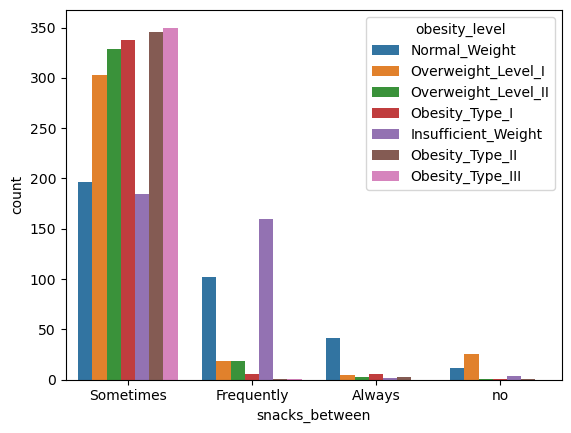

In [203]:
import seaborn as sns

# Tableau de contingence
contingency_table = pd.crosstab(df['snacks_between'], df['obesity_level'])

# Afficher le tableau de contingence
print(contingency_table)

# Visualisation avec un graphique en barres empilées
sns.countplot(data=df, x='snacks_between', hue='obesity_level')
plt.show()

la pluspart des gens avec une certaine obesite prent sometimes snacks , cependant les normal et weight maquant  sont divise entre frequement et sometimes , le reste on peut les négliger

obesity_level          Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
transport                                                                   
Automobile                              60             56             110   
Bike                                     0              8               0   
Motorbike                                0              8               3   
Public_Transportation                  285            245             236   
Walking                                  6             34               2   

obesity_level          Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
transport                                                                      
Automobile                         112                 1                  81   
Bike                                 1                 0                   3   
Motorbike                            0                 0                   1   
Public_Transportation              237               350    

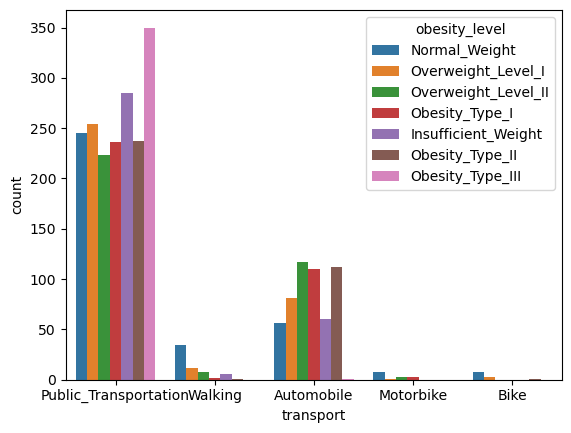

In [204]:
import seaborn as sns

# Tableau de contingence
contingency_table = pd.crosstab(df['transport'], df['obesity_level'])

# Afficher le tableau de contingence
print(contingency_table)

# Visualisation avec un graphique en barres empilées
sns.countplot(data=df, x='transport', hue='obesity_level')
plt.show()

on remarque une repartion tres varirée, pour chaque niveau

 *** Variables binaires ***

Kcal_control vs. Obesity Level :
 obesity_level  Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
Kcal_control                                                        
no                             324            316             349   
yes                             27             35               2   

obesity_level  Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
Kcal_control                                                           
no                         350               351                 303   
yes                          1                 0                  48   

obesity_level  Overweight_Level_II  
Kcal_control                        
no                             345  
yes                              6  


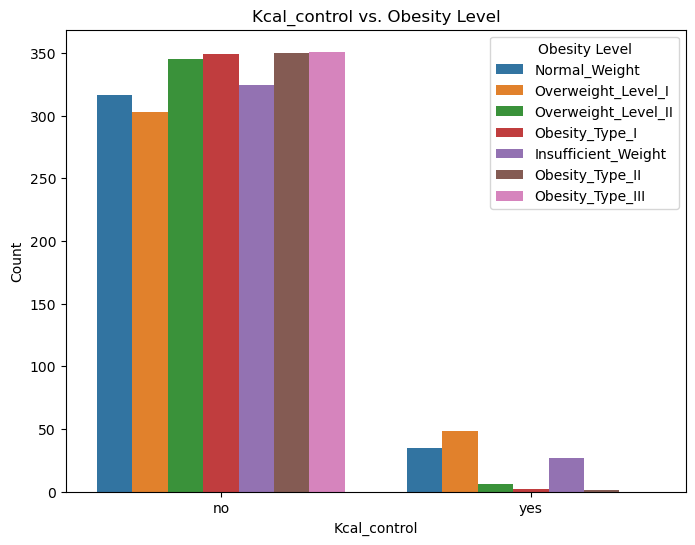

In [205]:
# Créer un tableau de contingence pour la variable Kcal_control et la variable cible
contingency_table_Kcal_control = pd.crosstab(df['Kcal_control'], df['obesity_level'])

# Afficher le tableau de contingence
print("Kcal_control vs. Obesity Level :\n", contingency_table_Kcal_control)

# Visualisation avec un graphique à barres
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Kcal_control', hue='obesity_level')
plt.title('Kcal_control vs. Obesity Level')
plt.xlabel('Kcal_control')
plt.ylabel('Count')
plt.legend(title='Obesity Level')
plt.show()


la pluspart des gens n ont pas du control sur leur kcal consomation

Smoke vs. Obesity Level :
 obesity_level  Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
smoke                                                               
no                             350            335             345   
yes                              1             16               6   

obesity_level  Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
smoke                                                                  
no                         333               350                 348   
yes                         18                 1                   3   

obesity_level  Overweight_Level_II  
smoke                               
no                             346  
yes                              5  


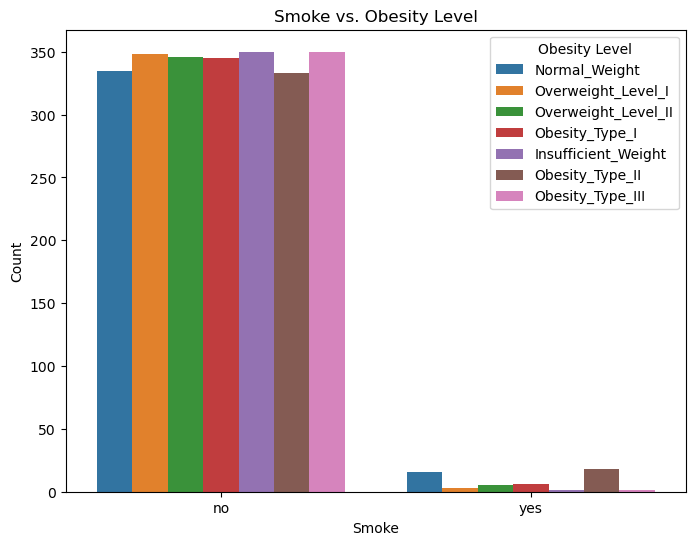

In [206]:
# Créer un tableau de contingence pour la variable smoke et la variable cible
contingency_table_smoke = pd.crosstab(df['smoke'], df['obesity_level'])

# Afficher le tableau de contingence
print("Smoke vs. Obesity Level :\n", contingency_table_smoke)

# Visualisation avec un graphique à barres
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='smoke', hue='obesity_level')
plt.title('Smoke vs. Obesity Level')
plt.xlabel('Smoke')
plt.ylabel('Count')
plt.legend(title='Obesity Level')
plt.show()


seul une monirité 'smoke', on remarque sur tous les niveau des gens

Family vs. Obesity Level :
 obesity_level  Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
family                                                              
no                             188            164               7   
yes                            163            187             344   

obesity_level  Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
family                                                                 
no                           2                 0                  85   
yes                        349               351                 266   

obesity_level  Overweight_Level_II  
family                              
no                              24  
yes                            327  


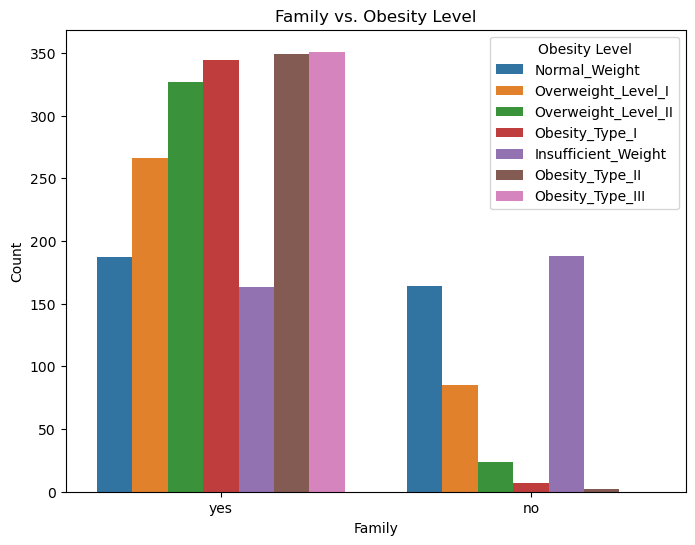

In [207]:
# Créer un tableau de contingence pour la variable family et la variable cible
contingency_table_family = pd.crosstab(df['family'], df['obesity_level'])

# Afficher le tableau de contingence
print("Family vs. Obesity Level :\n", contingency_table_family)

# Visualisation avec un graphique à barres
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='family', hue='obesity_level')
plt.title('Family vs. Obesity Level')
plt.xlabel('Family')
plt.ylabel('Count')
plt.legend(title='Obesity Level')
plt.show()


on remarque la pluspart des gens qui ont un surpoids (sauf obesity 2) ont de l histoire dobesite , les normal sont balance 50% a 50% comme l  obesite 2

Freq_high_calor vs. Obesity Level :
 obesity_level    Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
freq_high_calor                                                       
no                                67             98              11   
yes                              284            253             340   

obesity_level    Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
freq_high_calor                                                          
no                             9                 1                  29   
yes                          342               350                 322   

obesity_level    Overweight_Level_II  
freq_high_calor                       
no                                88  
yes                              263  


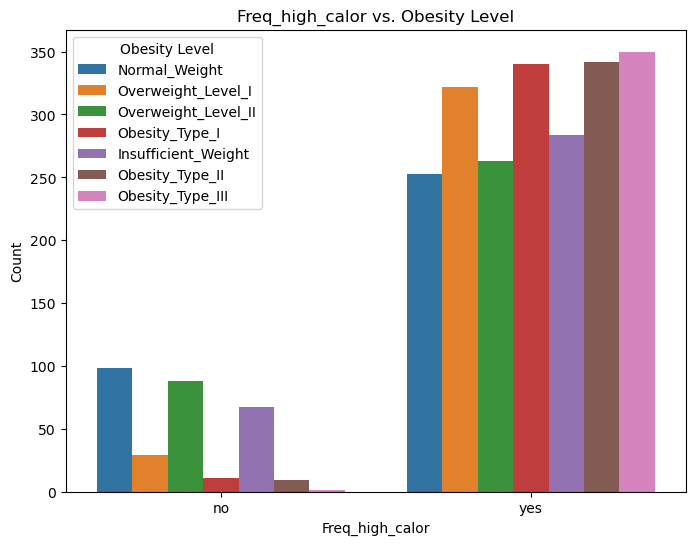

In [208]:
# Créer un tableau de contingence pour la variable freq_high_calor et la variable cible
contingency_table_freq_high_calor = pd.crosstab(df['freq_high_calor'], df['obesity_level'])

# Afficher le tableau de contingence
print("Freq_high_calor vs. Obesity Level :\n", contingency_table_freq_high_calor)

# Visualisation avec un graphique à barres
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='freq_high_calor', hue='obesity_level')
plt.title('Freq_high_calor vs. Obesity Level')
plt.xlabel('Freq_high_calor')
plt.ylabel('Count')
plt.legend(title='Obesity Level')
plt.show()


la majorité des gens normal ou nom consomme des choses high kcal (sauf une minorite de normal , overweight 2 , poids insuffisant)

variable multivariée

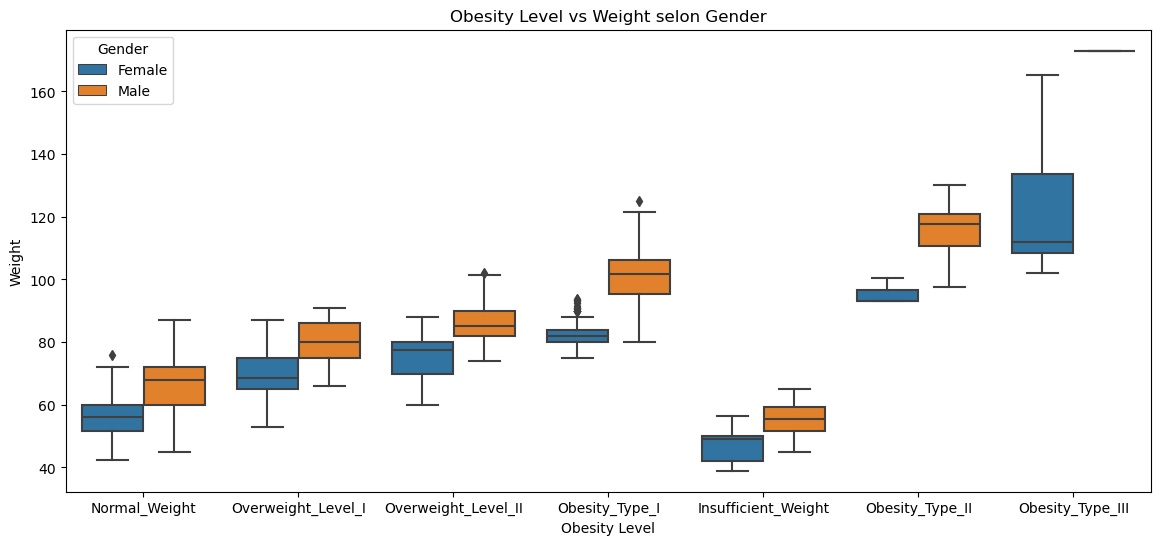

In [209]:
# Créer un diagramme en boîte pour visualiser la relation entre obesity_level, weight et gender
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='obesity_level', y='weight', hue='gender')
plt.title('Obesity Level vs Weight selon Gender')
plt.xlabel('Obesity Level')
plt.ylabel('Weight')
plt.legend(title='Gender')
plt.show()

c est naturel que le graveté d obesité augmente avec le poids , on remarque aussi qu au meme niveau d obesite les male ont toujours plus de poids que les females

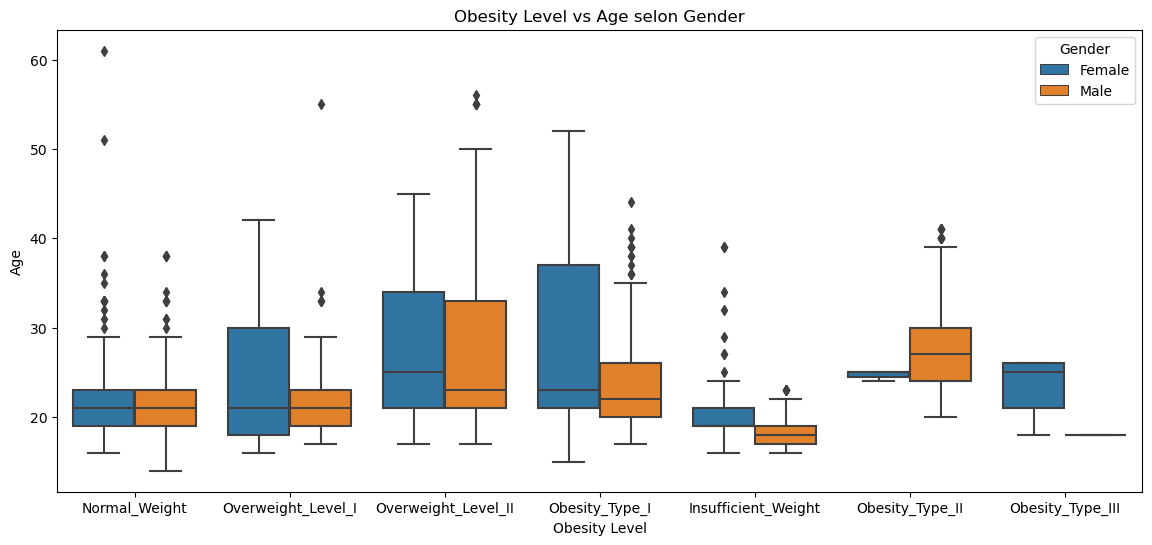

In [210]:
# Créer un diagramme en boîte pour visualiser la relation entre obesity_level, age et gender
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='obesity_level', y='age', hue='gender')
plt.title('Obesity Level vs Age selon Gender')
plt.xlabel('Obesity Level')
plt.ylabel('Age')
plt.legend(title='Gender')
plt.show()


il y a repartitiion un peu variée surtout an niveau de gender , mais on peut conclut que les gens agée sont susptibles plus que les auture generalement au grave niveau d'obesite, cependant les gens avec poids insuffisant sont en general des jeunes

In [211]:
# Afficher les valeurs uniques pour les variables catégorielles
for col in df.columns:
    if df[col].dtype == 'object':
        print(col, df[col].unique())

print("\n")

# Afficher le nombre de valeurs uniques pour les variables non catégorielles
for col in df.columns:    
    if df[col].dtype != 'object': 
        if df[col].nunique() < 5:
            print(col, '- unique values:', df[col].unique())
        else :
            print(col, '- number of unique values:', df[col].nunique())

gender ['Female' 'Male']
alcohol ['no' 'Sometimes' 'Frequently' 'Always']
freq_high_calor ['no' 'yes']
Kcal_control ['no' 'yes']
smoke ['no' 'yes']
family ['yes' 'no']
snacks_between ['Sometimes' 'Frequently' 'Always' 'no']
transport ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
obesity_level ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


age - number of unique values: 40
height - number of unique values: 1574
weight - number of unique values: 1525
freq_vegetab - number of unique values: 810
main_meals - number of unique values: 635
water - number of unique values: 1268
sport - number of unique values: 1190
tech_device - number of unique values: 1129


# **Modélisation**

In [212]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

#  a copy 
df_copy = df.copy()

# Encode categorical variables
categorical_cols = ['gender', 'alcohol', 'freq_vegetab', 'tech_device', 'snacks_between', 'transport']
df_encoded = pd.get_dummies(df_copy, columns=categorical_cols, drop_first=True)

# traitement missing values est deja fait

# Normalize  variables numersique
scaler = StandardScaler()
numerical_cols = ['age', 'height', 'weight', 'water', 'sport']
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# Split data into features (X) and target variable (y)
X = df_encoded.drop(columns=['obesity_level'])
y = df_encoded['obesity_level']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




# **evolution de modele**

In [214]:

# use logistic regression, 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Convertir les variables catégorielles en variables indicatrices
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Initialize and train
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Prédire la variable cible
y_pred = model.predict(X_test)

# Evaluer
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8861788617886179



Une précision de 0,87 indique que le modèle de régression logistique a atteint un bon niveau de précision dans la prédiction de la variable cible (obesity-level)

 * k means  

C:\Users\21698\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


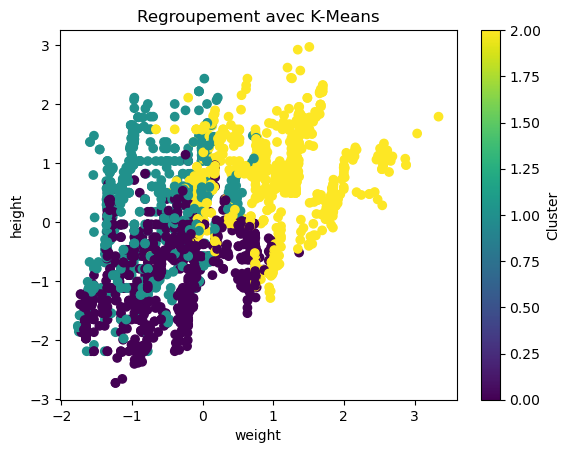

In [218]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Copier le DataFrame
df_copy = df.copy()

# Encoder variables catégorielles
colonnes_catégorielles = ['gender', 'alcohol', 'freq_vegetab', 'tech_device', 'snacks_between', 'transport', 'obesity_level']
df_encodé = pd.get_dummies(df_copy, columns=colonnes_catégorielles, drop_first=True)

# Sélectionner les caractéristiques
caractéristiques = ['age', 'height', 'weight', 'water', 'sport'] + df_encodé.columns.tolist()

# Filtrer colonnes non numériques
caractéristiques_numériques = df_encodé[caractéristiques].select_dtypes(include=[np.number])

# Standardiser les caractéristiques 
scaler = StandardScaler()
df_standardisé = scaler.fit_transform(caractéristiques_numériques)

# Initialiser K-Means 
kmeans = KMeans(n_clusters=3, random_state=42)

# Adapter K-Means 
kmeans.fit(df_standardisé)

# Visualiser la relation entre le poids et les autres caractéristiques
plt.scatter(df_standardisé[:, 2], df_standardisé[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel(caractéristiques[2])  # Modifier ceci pour sélectionner le poids
plt.ylabel(caractéristiques[1])  # Modifier ceci pour sélectionner une autre caractéristique
plt.title('Regroupement avec K-Means')
plt.colorbar(label='Cluster')
plt.show()


on va change avec 2 clusters

C:\Users\21698\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


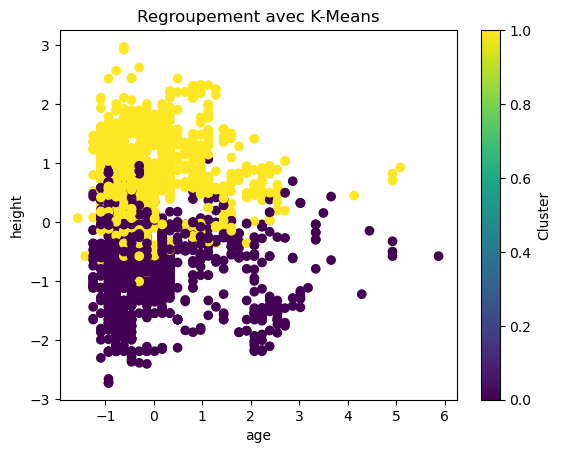

In [219]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Copier le DataFrame
df_copy = df.copy()

# Encoder variables catégorielles
colonnes_catégorielles = ['gender', 'alcohol', 'freq_vegetab', 'tech_device', 'snacks_between', 'transport', 'obesity_level']
df_encodé = pd.get_dummies(df_copy, columns=colonnes_catégorielles, drop_first=True)

# Sélectionner les caractéristiques
caractéristiques = ['age', 'height', 'weight', 'water', 'sport'] + df_encodé.columns.tolist()

# Filtrer colonnes non numériques
caractéristiques_numériques = df_encodé[caractéristiques].select_dtypes(include=[np.number])

# Standardiser les caractéristiques 
scaler = StandardScaler()
df_standardisé = scaler.fit_transform(caractéristiques_numériques)

# Initialiser K-Means 
kmeans = KMeans(n_clusters=2, random_state=42)

# Adapter K-Means 
kmeans.fit(df_standardisé)

# Visualiser la relation entre le poids et les autres caractéristiques
plt.scatter(df_standardisé[:, 2], df_standardisé[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel(caractéristiques[2])  # Modifier ceci pour sélectionner le poids
plt.ylabel(caractéristiques[1])  # Modifier ceci pour sélectionner une autre caractéristique
plt.title('Regroupement avec K-Means')
plt.colorbar(label='Cluster')
plt.show()
